In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Lasso Model Performance:
R² Score: 0.3751
RMSE: 4.3442
Number of test samples: 49


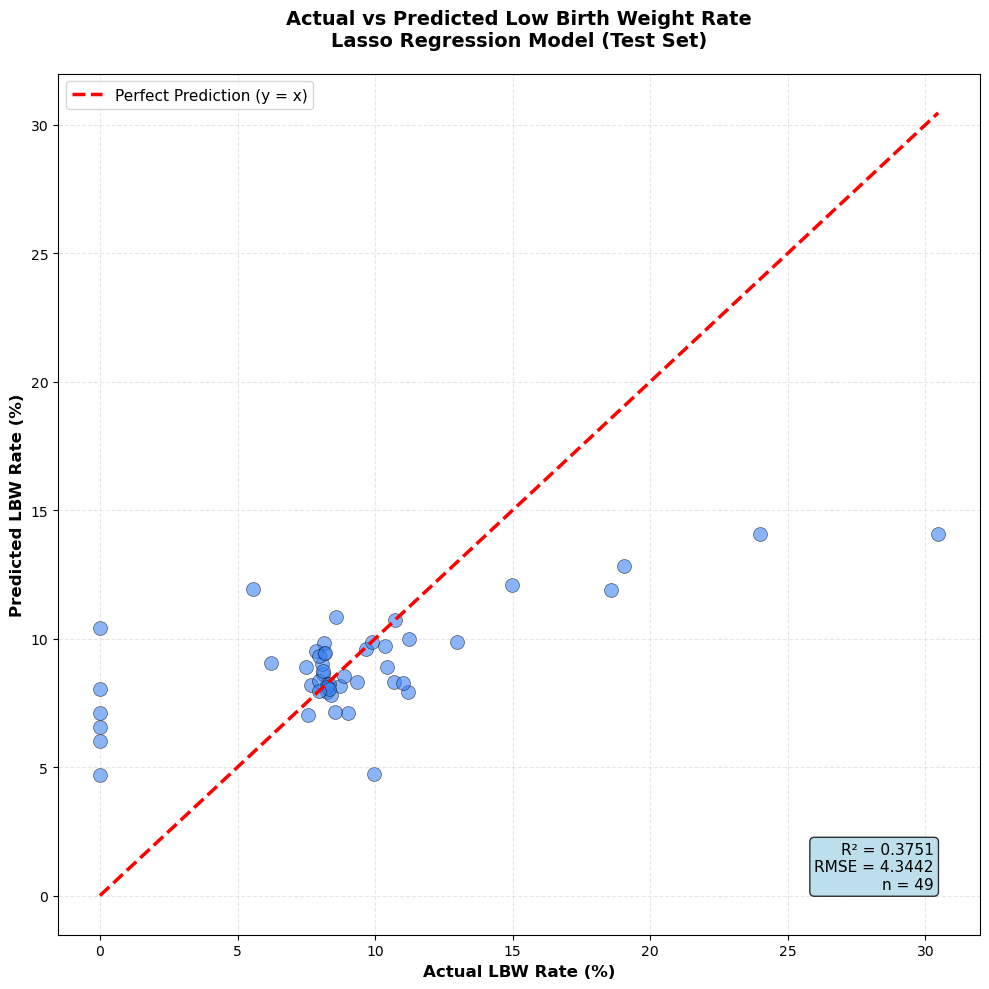

In [2]:
os.chdir('C:/Users/Demoted/Downloads/datasci/Data_Science_FP')

df = pd.read_csv('Cleaned output data files/final_model_dataset.csv')

y = df['LBW_Rate']
X = df[['combined_noise_mean_db', 'race_ethnicity_minority_status', 'black_prop',
         'insurance_coverage_prop', 'late_prenatal_care_prop', 'maternal_age_risk_prop', 
         'low_education_prop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f'Lasso Model Performance:')
print(f'R² Score: {r2_lasso:.4f}')
print(f'RMSE: {rmse_lasso:.4f}')
print(f'Number of test samples: {len(y_test)}')

plt.figure(figsize=(10, 10))

plt.scatter(y_test, y_pred_lasso, alpha=0.6, s=100, color='#3b82f6', edgecolors='black', linewidth=0.5)

min_val = min(y_test.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_lasso.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2.5, label='Perfect Prediction (y = x)')

plt.xlabel('Actual LBW Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted LBW Rate (%)', fontsize=12, fontweight='bold')
plt.title('Actual vs Predicted Low Birth Weight Rate\nLasso Regression Model (Test Set)', 
          fontsize=14, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper left')

textstr = f'R² = {r2_lasso:.4f}\nRMSE = {rmse_lasso:.4f}\nn = {len(y_test)}'
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()

os.makedirs('visualizations/visualization_media', exist_ok=True)
plt.savefig('visualizations/visualization_media/viz_07_actual_vs_predicted_lasso.png', dpi=300, bbox_inches='tight')